 This dataset contains sales from an online video game store that sells worldwide. This dataset will help identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.
 I will conduct the process of cleaning the data. from removing duplicates,fixing any structurl erros, filter unwanted outliers,and then validate if the data is sufficient for our analysis. I will also apply statistical methods to our clean dataset. 

# Importing Libraries and  opening the data file and studying the general information

In [2]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
data = pd.read_csv('games (1).csv')

# General View of the DataSet

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# using the lower case function for all columns
data.columns = data.columns.str.lower()
#changing column name for manipulation purposes
data.rename(columns = {'year_of_release':'release_year'}, inplace = True)
display(data.columns)

Index(['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
#general descriptiion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   release_year  16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
#Categorical variables contain a finite number of categories or distinct groups
#changing genre to category
data['genre'] = data['genre'].astype('category')
#changing platform to catgeory
data['platform'] = data['platform'].astype('category')

#changing user score to float64 and replace "TBD" with na for  manipulation purposes
data.user_score.replace({'tbd':np.nan}, inplace = True)
data['user_score'] = data['user_score'].astype('float64')
display(data.dtypes)


name              object
platform        category
release_year     float64
genre           category
na_sales         float64
eu_sales         float64
jp_sales         float64
other_sales      float64
critic_score     float64
user_score       float64
rating            object
dtype: object

In [8]:
#no duplicates in the dataset
display(data.duplicated().sum())
#Checking For na
display(data.isna().sum())

0

name               2
platform           0
release_year     269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      9125
rating          6766
dtype: int64

In [9]:
#checking Dataframe for missing values 
percentage_na = (data.isna().sum()/len(data))*100
percent_na = percentage_na.to_frame().style.background_gradient(cmap ="PuBu")
display(percent_na)

,0
name,0.011965
platform,0.000000
release_year,1.609333
genre,0.011965
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319174
user_score,54.591684


In [10]:
#drop columns with less than 5 percent
data.dropna(subset = ['name','release_year','genre'], inplace = True)

Leaving null values as is in columns critic_score,user_score and rating

In [12]:
#checking na values
display(data.isna().sum())

name               0
platform           0
release_year       0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8461
user_score      8981
rating          6676
dtype: int64

# Calculating Total Sales for each region

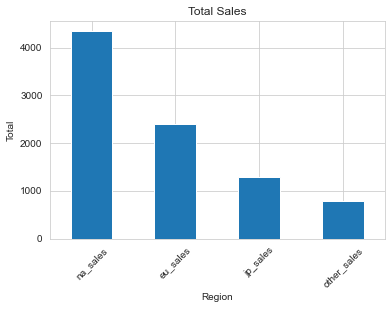

In [14]:
data.head()
data.agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','other_sales':'sum'}).plot(kind = "bar",)
plt.title('Total Sales')
plt.xlabel('Region')
plt.ylabel('Total')
plt.xticks(rotation = 45 )
plt.show()

In [15]:
#Calculate the total sales for each game
cols = ['na_sales','eu_sales','jp_sales','other_sales']
data['sale'] = data[cols].sum(axis = 1)
    

In [17]:
data.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Analyzing the data

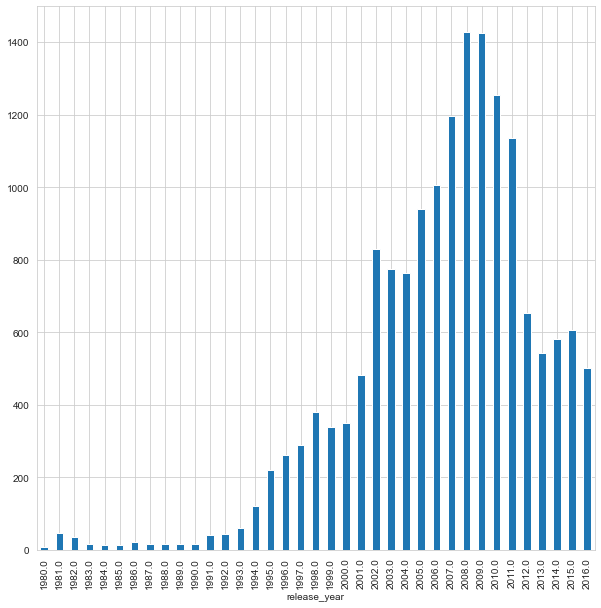

In [18]:
#games were released in different years
year = data.groupby('release_year')['name'].count().plot(kind = 'bar', figsize =(10,10))

In [19]:
#grouping by year and platform between 2006 and 2011 since there was an increase of games release in the chart above. 
game_rr = data.loc[data['release_year'].between(2006,2011)]
game_rgroup = game_rr.groupby(['release_year','platform']).agg({'name':'count'})
#If we change the release year from 2006,2007 and so on  we can see the popular platforms had the most game releases. 
display(game_rgroup.query('release_year == 2009'))

name
release_year platform      
2009.0       2600         0
             3DO          0
             3DS          0
             DC           0
             DS         403
             GB           0
             GBA          0
             GC           0
             GEN          0
             GG           0
             N64          0
             NES          0
             NG           0
             PC         107
             PCFX         0
             PS           0
             PS2         96
             PS3        162
             PS4          0
             PSP        161
             PSV          0
             SAT          0
             SCD          0
             SNES         0
             TG16         0
             WS           0
             Wii        325
             WiiU         0
             X360       172
             XB           0
             XOne         0

In [20]:
#grouping by platform and values are total sales 
platform = data.groupby('platform').agg({'sale':'sum'})
display(platform.sort_values('sale', ascending = False))

,sale
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [22]:
#grouping by platform and release year
platform_year = data.groupby(['platform','release_year']).agg({'sale':'sum'})
sort_platform = platform_year.sort_values(['platform','release_year']).reset_index()

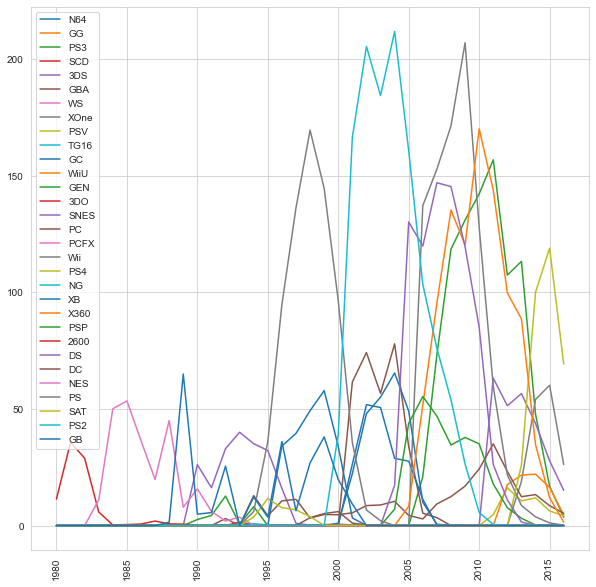

In [23]:
#Total sales for each platform
#sns.relplot( kind="line",data = sort_platform, x ='release_year', y = 'sale', hue ='platform', height=20, lw=0)
sort_set = set(sort_platform['platform'])
plt.figure(figsize=(10, 10))
for x in sort_set:
    select_data = sort_platform.loc[sort_platform['platform'] == x]
    plt.plot(select_data['release_year'], select_data['sale'], label = x)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# It takes an average of 5 years for a platform to start and then fade.

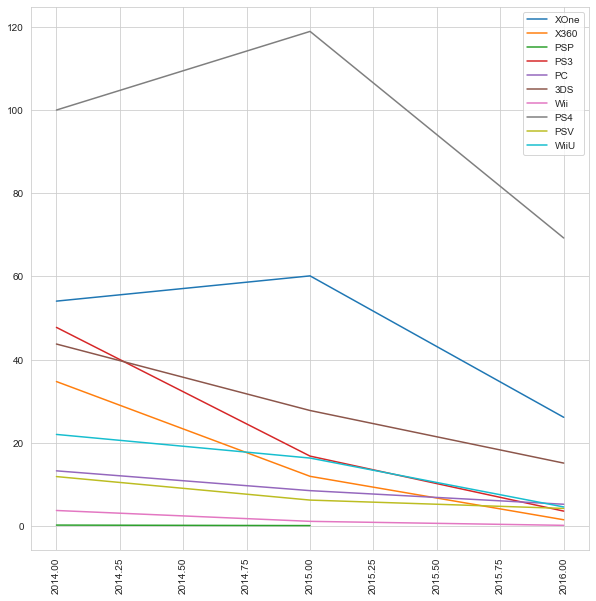

In [24]:
#separating data from 2012 and eariler 
new_sales = sort_platform.query('release_year>2013')
new_sales = new_sales[new_sales['sale'] >0]
sort_set = set(new_sales['platform'])
plt.figure(figsize=(10, 10))
for x in sort_set:
    select_data = new_sales.loc[new_sales['platform'] == x]
    plt.plot(select_data['release_year'], select_data['sale'], label = x)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# All sales are declining coming into the year as they reach there peak

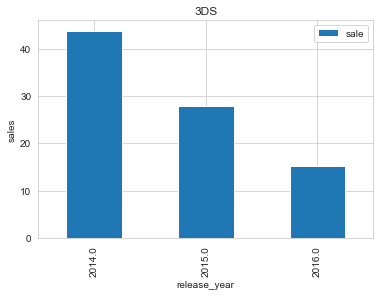

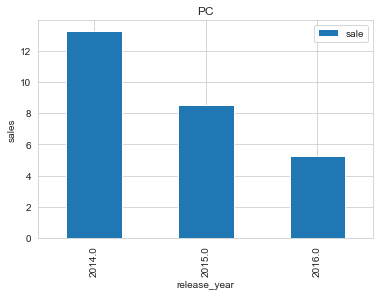

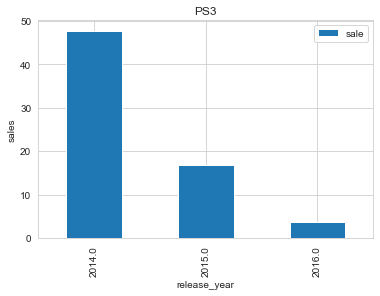

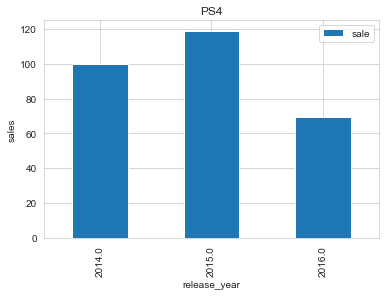

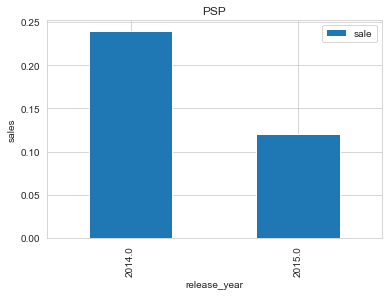

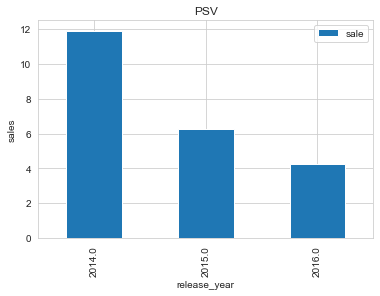

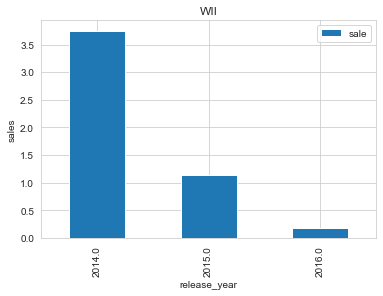

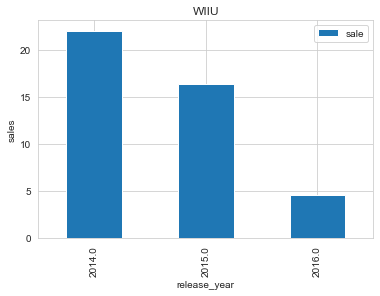

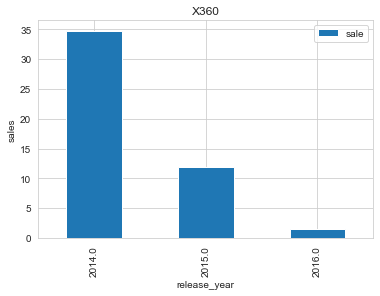

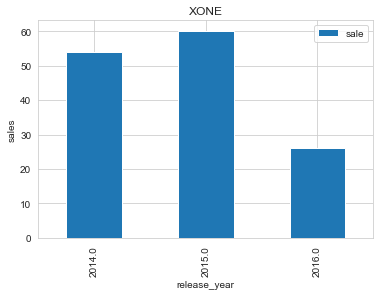

In [25]:
for x in new_sales['platform'].unique():
    new_sales.query('platform == @x').plot(kind = 'bar',x = 'release_year',y = 'sale')
    plt.title(x.upper())
    plt.ylabel('sales')

In [26]:
data.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [27]:
#Removing outliers
cols = ['na_sales','eu_sales','jp_sales','other_sales']
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

lower_range = Q1 - (1.5* IQR)
print(f'Lower Range \n{lower_range}')
print()
upper_range = Q3 + (1.5 * IQR)
print(f'Lower Range \n{upper_range}')



data= data[~((data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

Lower Range 
na_sales      -0.360
eu_sales      -0.165
jp_sales      -0.060
other_sales   -0.045
dtype: float64

Lower Range 
na_sales       0.600
eu_sales       0.275
jp_sales       0.100
other_sales    0.075
dtype: float64


<AxesSubplot:title={'center':'sale'}, xlabel='platform'>

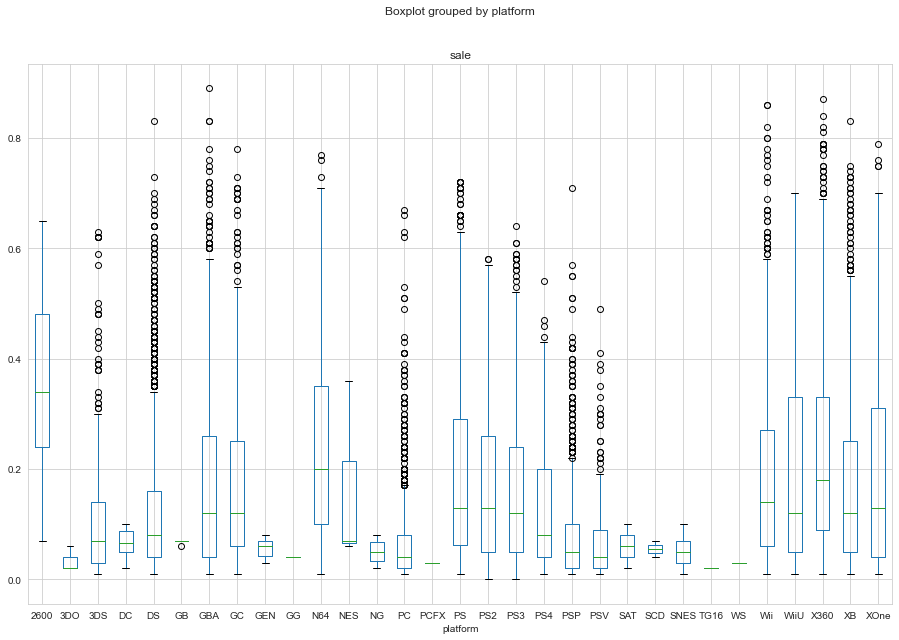

In [28]:
#box plot for the global sales of all games, broken down by platform
sales_box = data.boxplot(column = 'sale',by = 'platform', figsize = (15,10))
display(sales_box)
plt.show()

The correlation between User_score and Sales is 0.024894570317072217


<AxesSubplot:xlabel='user_score', ylabel='sale'>

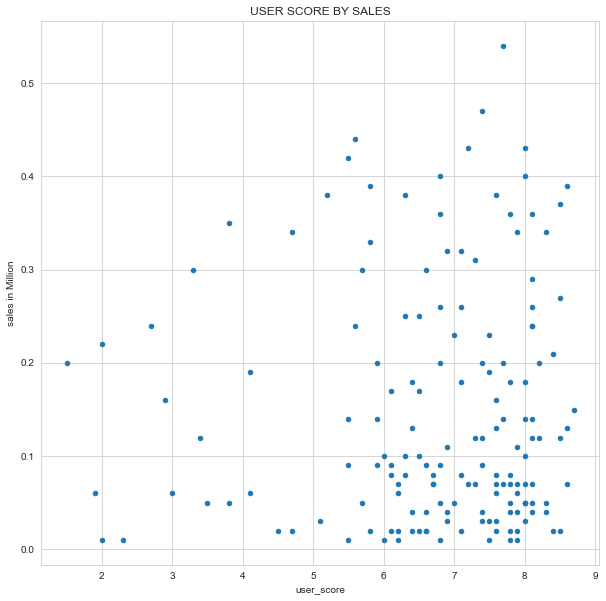

In [29]:
#Plotting ps4platform by user_score and sales
ps4=data.query('platform == "PS4"')
cor = ps4['user_score'].corr(ps4['sale'])
print(f'The correlation between User_score and Sales is {cor}')
display(ps4.plot(kind = 'scatter',x = 'user_score', y = 'sale', figsize = (10,10)))
plt.title('USER SCORE BY SALES')
plt.ylabel('sales in Million')
plt.show()

The correlation between User_score and Sales is 0.004392775910528652


<AxesSubplot:xlabel='user_score', ylabel='sale'>

Text(0, 0.5, 'sales in Million')

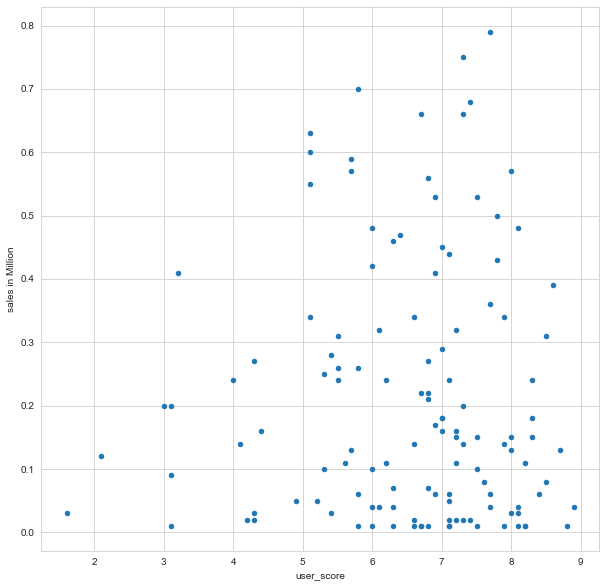

In [30]:

xone=data.query('platform == "XOne"')
cor = xone['user_score'].corr(xone['sale'])
print(f'The correlation between User_score and Sales is {cor}')
display(xone.plot(kind = 'scatter',x = 'user_score', y = 'sale',figsize = (10,10)))
plt.ylabel('sales in Million')

The correlation between critic_score and Sales is 0.3000505375227074


<AxesSubplot:xlabel='critic_score', ylabel='sale'>

Text(0, 0.5, 'sales in Million')

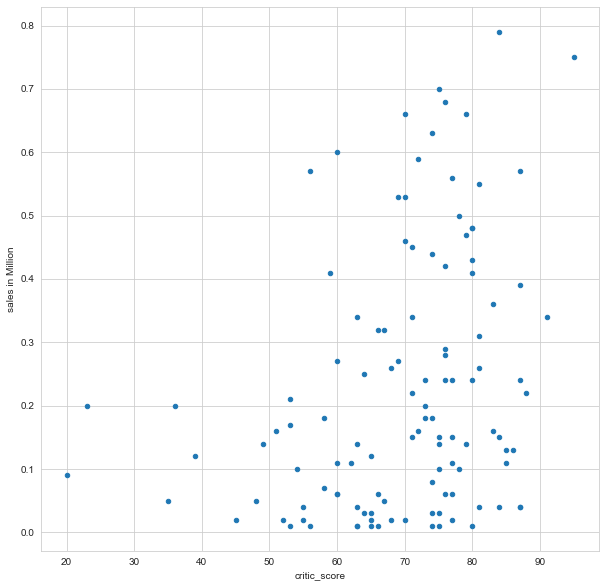

In [31]:
cor = xone['critic_score'].corr(xone['sale'])
print(f'The correlation between critic_score and Sales is {cor}')
display(xone.plot(kind = 'scatter',x = 'critic_score', y = 'sale',figsize = (10,10)))

plt.ylabel('sales in Million')

The correlation between User score and Sale: -0.10080892763539202


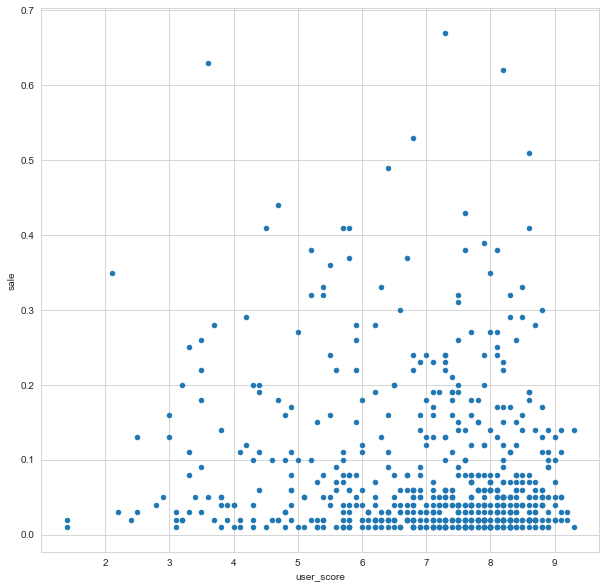

In [32]:
pc= data.query('platform == "PC"')
pc.plot(kind = 'scatter',x = 'user_score', y = 'sale', figsize=(10,10))
corr = pc['sale'].corr(pc['user_score'])
print(f'The correlation between User score and Sale: {corr}')

The correlation between User score and Sale: 0.16452475047789733


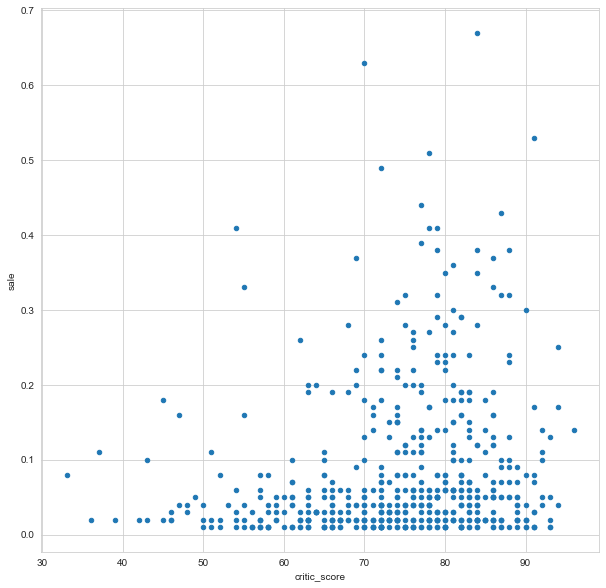

In [33]:
pc.plot(kind = 'scatter',x = 'critic_score', y = 'sale', figsize=(10,10))
corr = pc['sale'].corr(pc['critic_score'])
print(f'The correlation between User score and Sale: {corr}')

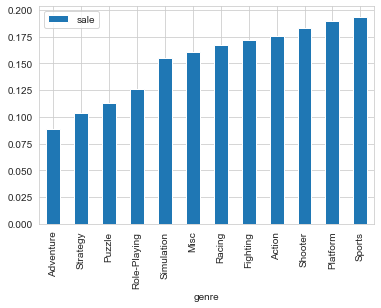

In [34]:
#SPORT is the top game with sals

genre= data.groupby(['genre']).agg({'sale':'mean'}).sort_values('sale').plot(kind = 'bar')

# User Profile by Region

In [36]:
#separating region 

na = data.drop(columns = ['eu_sales','jp_sales','other_sales'])
eu = data.drop(columns = ['na_sales','jp_sales','other_sales'])
jp = data.drop(columns = ['eu_sales','na_sales','other_sales'])
other= data.drop(columns = ['eu_sales','jp_sales','na_sales'])



In [37]:
#sales by platfrom in different region 
#PS2 seems to be very popular in all platfroms 
na_platform = na.groupby('platform').agg({'na_sales':'sum'})
eu_platform = eu.groupby('platform').agg({'eu_sales':'sum'})
jp_platform = jp.groupby('platform').agg({'jp_sales':'sum'})
other_platform  = other.groupby('platform').agg({'other_sales':'sum'})

<AxesSubplot:ylabel='na_sales'>

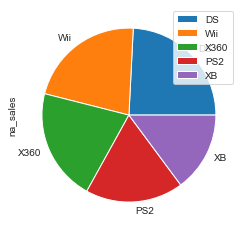

In [38]:
#most of the sales are coming from the NA_sales column
display(na_platform.sort_values('na_sales',ascending = False).head().plot(kind = 'pie', y = 'na_sales'))
plt.show()

<AxesSubplot:ylabel='jp_sales'>

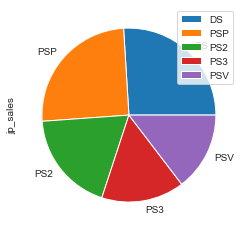

In [39]:
display(jp_platform.sort_values('jp_sales',ascending = False).head().plot(kind = 'pie',y = 'jp_sales'))
plt.show()

<AxesSubplot:ylabel='eu_sales'>

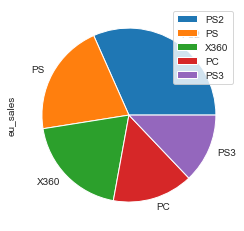

In [40]:
display(eu_platform.sort_values('eu_sales',ascending = False).head().plot(kind = 'pie',y = 'eu_sales'))
plt.show()

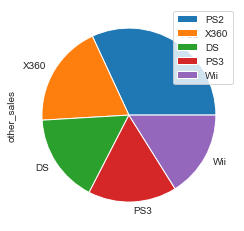

In [41]:
other_pie = other_platform.sort_values('other_sales',ascending = False).head().plot(kind = 'pie', y = 'other_sales')
plt.show()

In [42]:
#grouping genre by sales according to region
genre_na = na.groupby('genre').agg({'na_sales':'sum'})
genre_eu = eu.groupby('genre').agg({'eu_sales':'sum'})
genre_jp = jp.groupby('genre').agg({'jp_sales':'sum'})
genre_other = other.groupby('genre').agg({'other_sales':'sum'})

<AxesSubplot:ylabel='na_sales'>

<AxesSubplot:ylabel='eu_sales'>

<AxesSubplot:ylabel='jp_sales'>

<AxesSubplot:ylabel='other_sales'>

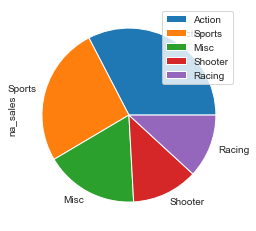

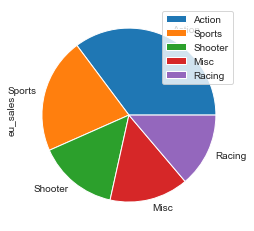

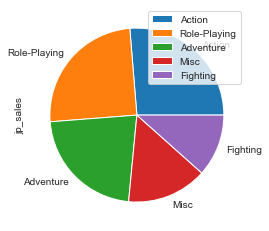

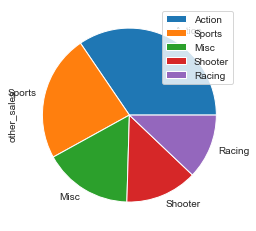

In [43]:
#Action,Sports and Shooter are the top in all regions 
display(genre_na.sort_values('na_sales',ascending = False).head().plot(kind = 'pie',y = 'na_sales'))
display(genre_eu.sort_values('eu_sales',ascending = False).head().plot(kind = 'pie',y = 'eu_sales'))
display(genre_jp.sort_values('jp_sales',ascending = False).head().plot(kind = 'pie',y = 'jp_sales'))
display(genre_other.sort_values('other_sales',ascending = False).head().plot(kind = 'pie',y = 'other_sales'))

In [44]:
#groupping by region and there sum of rating 
na_rating = na.groupby('rating').agg({'na_sales':'sum'})
eu_rating = eu.groupby('rating').agg({'eu_sales':'sum'})
jp_rating=jp.groupby('rating').agg({'jp_sales':'sum'})
other_rating = other.groupby('rating').agg({'other_sales':'sum'})

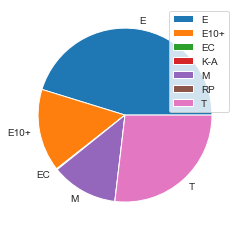

In [45]:
#display all regions 
na_rating.plot(kind = 'pie', label = '', y = 'na_sales')

plt.show()


<AxesSubplot:>

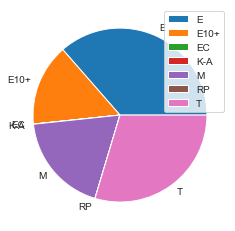

In [46]:
eu_rating.plot(kind = 'pie', label = '', y = 'eu_sales')

<AxesSubplot:>

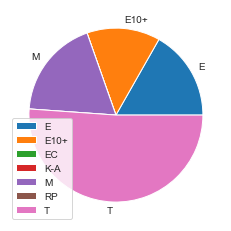

In [47]:
jp_rating.plot(kind = 'pie', label = '', y = 'jp_sales')

<AxesSubplot:>

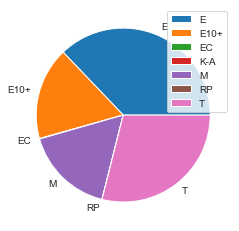

In [48]:
other_rating.plot(kind = 'pie', label = '', y = 'other_sales')

#### The majority of sales by genre,rating, and platform are coming From the NA_sales column. The majority of sales are coming from XBOX and PS2 or PS3 THE E rating holds the most value in all columns. In the genre setting we can see that sports has recevied the most sales. Compared to other. I would consider marketing sport games that have the rating E and are on popular platforms like XBOX or PS

# Testing Hypothese

In [50]:
#Separating xone rating and PC rating
x_one = data.loc[data['platform'] == 'XOne', 'user_score']
pc = data.loc[data['platform'] == 'PC', 'user_score']

# H0:Average user ratings of the Xbox One and PC platforms are the same
# H1: User ratings are Different from xbox one and pc

In [52]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(x_one, pc)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  nan
We can't reject the null hypothesis


# H0 - Average user ratings for the Action and Sports genres are different.
# H1 - Average User ratings are the same for Actions and Sports genres

In [54]:
action = data.loc[data['genre'] == 'Action','user_score']
sports= data.loc[data['genre'] == 'Sports','user_score']

In [55]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(action, sports)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  nan
We can't reject the null hypothesis


# Conclusion 
The games dataset show a variety of sales from different platforms, games, and their region sold. Most of the popular games genre are in Action and Sports with Shooter coming in right below it. This might the case that Players can play agaisnt eachother and have a competive competion between them. The top ESRB rating was E which is for everyone. This rating is for all ages that can play any game. The top platform from this dataset was Ps2 being at the top for all regions. We can conclude that it takes an average of 5 years for a platform to be release then end slowly. As new platfroms are release then everyone migrates to the new platfrom. We can see that from 2006-2011 There was an increase in Game released which helped platforms like WII and Xbox and DS. Making a game that has a ESRB rating of E on a new platform just lauching is the right choice for game developers. Starting Right when the platforms launches gives you an advantage of running sequels to your game. 